# **Pothole Detection**
- **[Models - YoloV8](https://docs.ultralytics.com/es/models/yolov8/#supported-tasks-and-modes)**
- **[YoloV8 Reporsitory](https://github.com/ultralytics/ultralytics)**
- **[Guide](https://docs.ultralytics.com/es/guides/#guides)**
- **[Performance-Metrics](https://docs.ultralytics.com/es/guides/yolo-performance-metrics/#object-detection-metrics)**

# **Train YoloV8**

In [12]:
# Download YOLOv8s-cls to be trained
from ultralytics import YOLO 
model = YOLO("yolov8s.pt")

In [ ]:
# Download the dataset
from roboflow import Roboflow
rf = Roboflow(api_key="J829BSese6NgVXXuT2u7")
project = rf.workspace("work-vc34v").project("pothole-ia66c")
dataset = project.version(3).download("yolov8")

In [ ]:
# Train the model with the selected dataset with the paths in the yaml document
model.train(data = ".\data.yaml", epochs = 3, conf = 0.10 , batch=2)

# **Analyse the model**

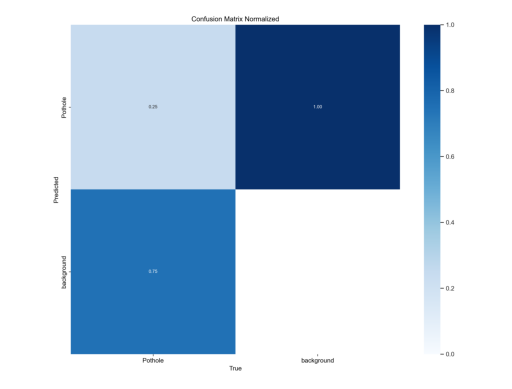

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Confusion Matrix Normalized
image_path = r"C:\Users\user\runs\detect\train3\confusion_matrix_normalized.png"

imagen = Image.open(image_path)

plt.imshow(imagen)
plt.axis('off')  
plt.show()

In [14]:
# Load a custom model with the best weights 
best_model = YOLO(r'C:\Users\user\runs\detect\train3\weights\best.pt')  
# or you can use the pre-trained model
model

# Validate the model
metrics = best_model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.196  Python-3.11.8 torch-2.1.2+cpu CPU (Intel Core(TM) i5-4300U 1.90GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning C:\Users\user\Desktop\Git-Repositories\Pothole_Detection\Pothole-3\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.93s/it]
                   all          8          8      0.173       0.25     0.0692     0.0224
Speed: 6.4ms preprocess, 822.9ms inference, 0.0ms loss, 16.7ms postprocess per image
Results saved to C:\Users\user\runs\detect\val2


array([   0.022438])

In [29]:
# Load a model
best_model = YOLO(r'C:\Users\user\runs\detect\train3\weights\best.pt')  

# Customize validation settings
validation_results = best_model.val(data='data.yaml',
                               imgsz=640,
                               batch=1,
                               conf=0.25,
                               iou=0.6,
                               device='')

Ultralytics YOLOv8.0.196  Python-3.11.8 torch-2.1.2+cpu CPU (Intel Core(TM) i5-4300U 1.90GHz)
val: Scanning C:\Users\user\Desktop\Git-Repositories\Pothole_Detection\Pothole-3\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]
                   all          8          8       0.25      0.125      0.141     0.0141
Speed: 5.3ms preprocess, 832.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to C:\Users\user\runs\detect\val10


# **Run the model**

In [ ]:
# Infererence model with the best weights
# Image
best_model.predict(r'C:\Users\user\Desktop\Git-Repositories\Pothole_Detection\Pothole-3\valid\images\300px-Newport_Whitepit_Lane_pot_hole-JPG_jpg.rf.0e55c4e267f905d23628d27eb23fb629.jpg', save = True, save_txt = True, max_det = 3)
# Video
# best_model("/content/video.mp4" , save=True)